In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('LR.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [3]:
#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
y_pred= classifer.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.91

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



[0.         0.08823529 1.        ]
[0.      0.90625 1.     ]
[2 1 0]


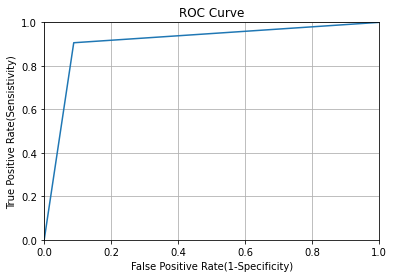

In [11]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate(Sensistivity)")
plt.grid(True)
print(fpr)
print(tpr)
print(thresholds)




In [12]:
from sklearn.metrics import roc_auc_score   #area under the curve
roc_auc_score(y_test,y_pred)


0.9090073529411765

In [14]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test,y_pred)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,1]

In [16]:
TP,TN,FP,FN


(29, 62, 6, 29)

In [20]:
#accuracy
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred))

0.7222222222222222
0.91
